# 13 NetCDF and `xarray`

In this lesson, we will get acquainted with a popuar format for working with multidimensional datasets called NetCDF and the Python package `xarray` which is based on NetCDF. 


In [16]:
# Import packages
import os 
import numpy as np 
import pandas as pd
import xarray as xarray 

### Variable values

The underlying data in the `xarray.DataArray` is a `numpy.array` that holds the variable values. 

In [17]:
# Values of a single variable at each point of the coords (from notes)
temp_data = np.array([np.zeros((5,5)), 
                      np.ones((5,5)), 
                      np.ones((5,5))*2]).astype(int) # to duplicate

# indexes by row, then looks for column (longitude is 3rd dimensions)
temp_data

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])

### Dimensions and Coordinates

To specify the dimensions of our upcoming `xarray.DataArray`, we must examine how we've constructed the `numpy.array` holding the temperature data. 
The first dimension is time, the second is latitude, and longitude the third. 

From our exercises, we can also see that the coordinates (values of each dimension) are:

- time coordinates are 2022-09-01, 2022-09-02, 2022-09-03
- latitude coordinates are 70, 60, 50, 40, 30 (notice decreasing order)
- longitude coordinates are 60, 70, 80, 90, 100 (notice increasing order)

We add the dimensions as a tuple of strings and coordinates as a dictionary:

In [23]:
# Names of the dimensions in the required order
dims = ("time", "lat", "lon")

# Create coordinates to use for indexing along each dimension 
coords = {'time':pd.date_range("2022-09-01", "2022-09-03"), # first dimension
          'lat':np.arange(70, 20, -10), # second dimension
          'lon':np.arange(60, 110, 10)}  # third dimension

In [24]:
coords # names of coordinates in dictionary

{'time': DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-03'], dtype='datetime64[ns]', freq='D'),
 'lat': array([70, 60, 50, 40, 30]),
 'lon': array([ 60,  70,  80,  90, 100])}

#### Attributes

Next, we add the attributes (metadata) for our temperature data as a dictionary:

In [25]:
# Attributes (metadata) of the data array 
attrs = { 'title':'temperature across weather stations',
          'standard_name':'air_temperature',
          'units':'degree_c'}

In [26]:
attrs # attribute info

{'title': 'temperature across weather stations',
 'standard_name': 'air_temperature',
 'units': 'degree_c'}

#### Putting it all together

Finally, we put all these pieces together (data, dimensions, coordinates, and attributes) to create an `xarray.DataArray`:

In [27]:
# Initialize xarray.DataArray
temp = xr.DataArray(data = temp_data, 
                    dims = dims,
                    coords = coords,
                    attrs = attrs)
temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          temperature across weather stations
    standard_name:  air_temperature
    units:          degree_c

We can also update the variable’s attributes after creating the object. 
Notice that each of the coordinates is also an `xarray.DataArray`, so we can add attributes to them.

In [28]:
# Update attributes
temp.attrs['description'] = 'Simple example of an xarray.DataArray'

# Add attributes to coordinates 
temp.time.attrs = {'description':'date of measurement'}

temp.lat.attrs['standard_name']= 'grid_latitude'
temp.lat.attrs['units'] = 'degree_N'

temp.lon.attrs['standard_name']= 'grid_longitude'
temp.lon.attrs['units'] = 'degree_E'
temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          temperature across weather stations
    standard_name:  air_temperature
    units:          degree_c
    description:    Simple example of an xarray.DataArray

## Subsetting
We can subset data from `xarray` by looking up the dimension by position OR by its name.



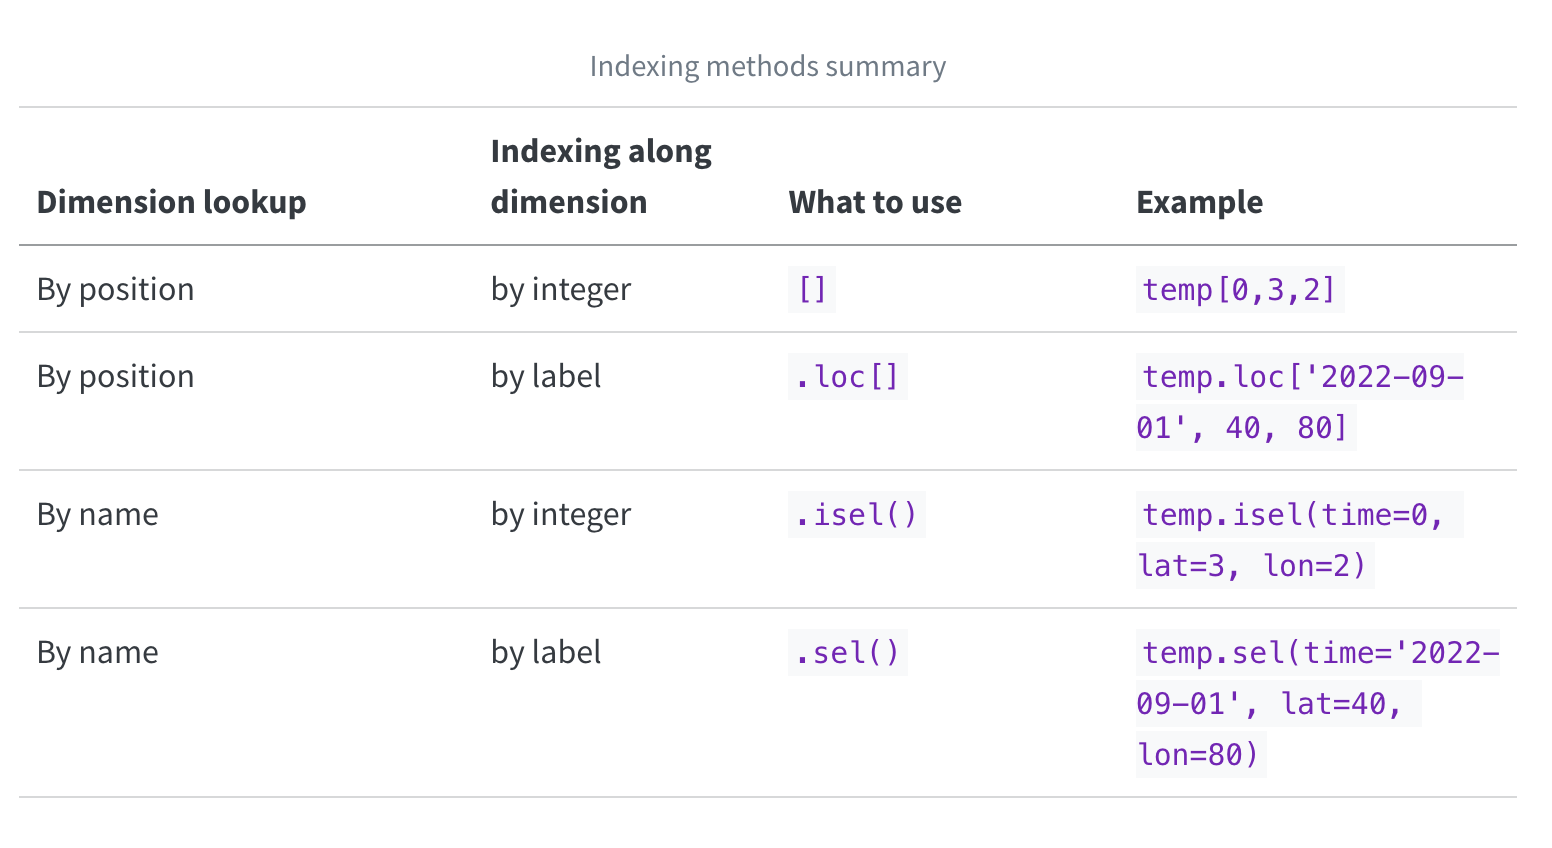

In [ ]:
# Access dimensions by name and then use labels for indexing
temp.sel(time = "2022-09-01", lat = 40, lon = 80) # 1x1 xarray

<xarray.DataArray ()> Size: 8B
array(0)
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 40
    lon      int64 8B 80
Attributes:
    title:          temperature across weather stations
    standard_name:  air_temperature
    units:          degree_c
    description:    Simple example of an xarray.DataArray

In [ ]:
# Cast 1d xarray as a number
temp.sel(time = "2022-09-01", lat = 40, lon = 80).item() # 1x1 xarray

0

## Reduction
`xarray` has several methods to reduce an `xarray.DataArray` along any number of dimensions. 
We can calculate the avg temp at each weather station over time and get a new `DataArray`. 

In [31]:
temp.mean(dim = "time")

<xarray.DataArray (lat: 5, lon: 5)> Size: 200B
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
Coordinates:
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100

In [32]:
avg_temp = temp.mean(dim = 'time') 

avg_temp.attrs = {'title':'Average temperature over three days'}
avg_temp

<xarray.DataArray (lat: 5, lon: 5)> Size: 200B
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
Coordinates:
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:    Average temperature over three days

## `xarray.DataSet` 
`xarray.Data.Array` = just one variable 

`xarray.Data.Set` = multiple variables an in-memory representation of a Net CDF file, each variable is an `xarray.DataArray`. 
Variables in the `xarray.DataSet` can have the SAME dimensions, share some dimensions, or have no dimensions in common.



Bundle avg temp and temp data together

In [33]:
# Make dictionaries with variables and dictionaries
# Make dictionaries with variables and attributes
data_vars = {'avg_temp': avg_temp,
             'temp': temp
             }

attrs = {'title':'Temperature data at weather stations: daily and and average',
         'description':'Simple example of an xarray.Dataset'
         }

# Create xarray.Dataset
temp_dataset = xr.Dataset( data_vars = data_vars,
                           attrs = attrs
                           )

In [34]:
temp_dataset

<xarray.Dataset> Size: 904B
Dimensions:   (lat: 5, lon: 5, time: 3)
Coordinates:
  * lat       (lat) int64 40B 70 60 50 40 30
  * lon       (lon) int64 40B 60 70 80 90 100
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
Data variables:
    avg_temp  (lat, lon) float64 200B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    temp      (time, lat, lon) int64 600B 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2
Attributes:
    title:        Temperature data at weather stations: daily and and average
    description:  Simple example of an xarray.Dataset

In [35]:
# save as netcdf
temp_dataset.to_netcdf("temp_dataset.nc")

In [36]:
xr.open_dataset("temp_dataset.nc")

<xarray.Dataset> Size: 564B
Dimensions:   (lat: 5, lon: 5, time: 3)
Coordinates:
  * lat       (lat) int32 20B 70 60 50 40 30
  * lon       (lon) int32 20B 60 70 80 90 100
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
Data variables:
    avg_temp  (lat, lon) float64 200B ...
    temp      (time, lat, lon) int32 300B ...
Attributes:
    title:        Temperature data at weather stations: daily and and average
    description:  Simple example of an xarray.Dataset